# Requirements

In [ ]:
# Add as many imports as you need.

In [1]:
# Add as many imports as you need.
# Write your code here. Add as many boxes as you need.

# Add as many imports as you need.
# Add as many imports as you need.
import pandas as pd

from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
from VNP.packages.vnp_ez import *
%load_ext autoreload
%autoreload 2

In [2]:
from keras.api.models import Sequential
from keras.api.layers import Input, LSTM, Dense
import keras

# Laboratory Exercise - Run Mode (8 points)

## Introduction
In this laboratory assignment, the primary objective is to use Long Short-Term Memory (LSTM) networks for time series forecasting in order to predict the current **mean temperature** in the city of Delhi. To accomplish this use data from the past three days, which includes information such as the **mean temperature**, **humidity**, **wind speed**, and **mean pressure**. The goal is to employ LSTM, a type of recurrent neural network, to effectively forecast the future mean temperature based on the provided historical data.

**Note: You are required to perform this laboratory assignment on your local machine.**

## The Climate Dataset

## Downloading the Climate Dataset

## Exploring the Climate Dataset
This dataset consists of daily weather records for the city of Delhi spanning a period of 4 years (from 2013 to 2017). The dataset includes the following attributes:

- date - date in the format YYYY-MM-DD,
- meantemp - mean temperature averaged from multiple 3-hour intervals in a day,
- humidity - humidity value for the day (measured in grams of water vapor per cubic meter volume of air),
- wind_speed - wind speed measured in kilometers per hour, and
- meanpressure - pressure reading of the weather (measured in atm).

*Note: The dataset is complete, with no missing values in any of its entries.*

Load the dataset into a `pandas` data frame.

In [5]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("../data/climate-data.csv")

In [6]:
df

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [8]:
df["date"] = pd.to_datetime(df["date"])
df.set_index(keys=["date"], inplace=True)
df.sort_index(inplace=True)
df

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [10]:
df.isna().isnull().sum()

meantemp        0
humidity        0
wind_speed      0
meanpressure    0
dtype: int64

<Axes: >

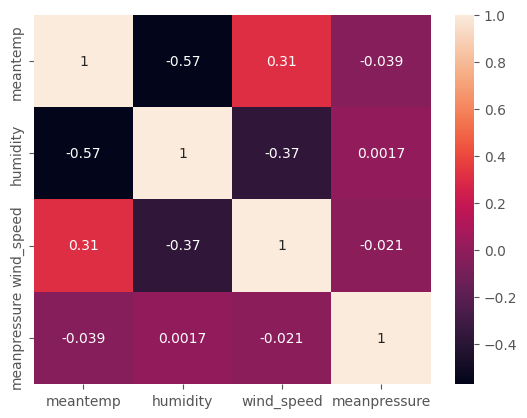

In [12]:
sns.heatmap(df.corr(), annot=True)

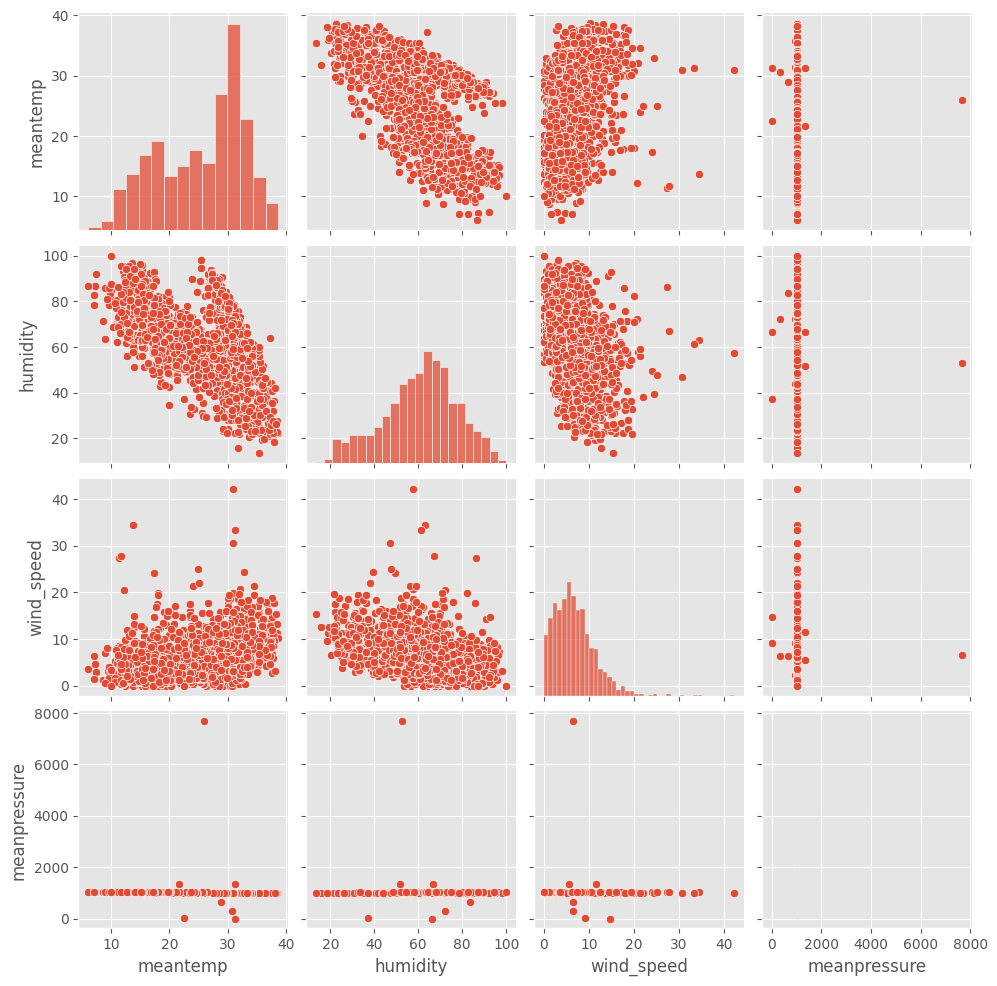

In [13]:
sns.pairplot(df)

In [14]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [15]:
features = ['humidity', 'wind_speed', 'meanpressure']
target = "meantemp"

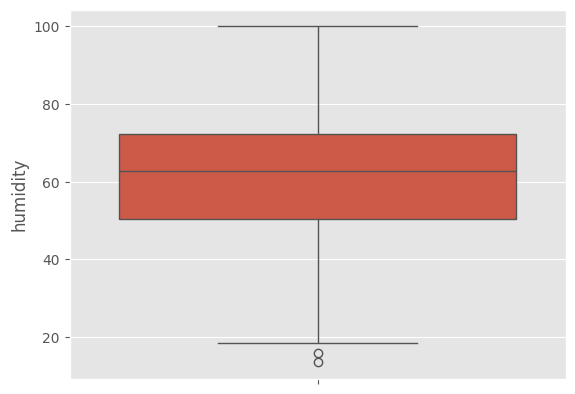

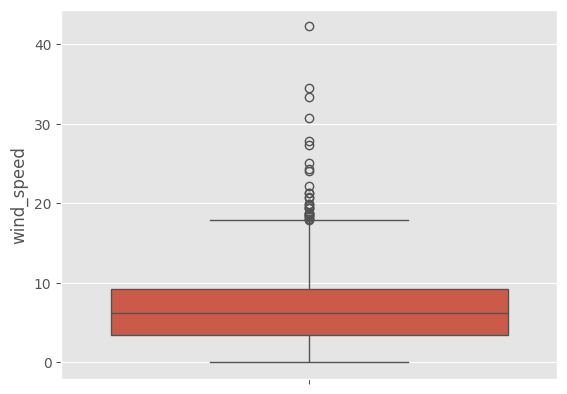

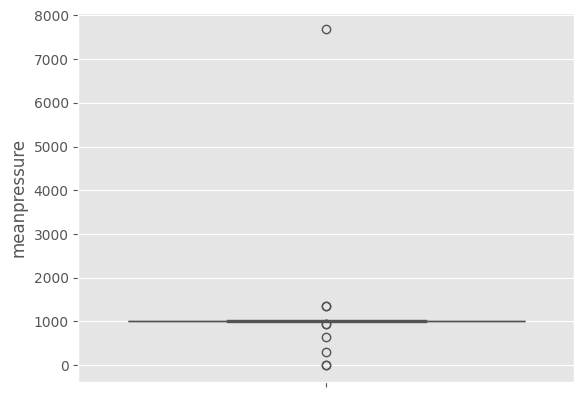

In [18]:
for feature in features:
    sns.boxplot(df[feature])
    plt.show()

In [ ]:
def grouped_corr(df: pd.DataFrame):
    qualitative_attributes = [col for col in df.columns if len(df[col].unique()) <= 10]
    quantitative_attributes = [col for col in df.columns if len(df[col].unique()) > 10]
    for cat in qualitative_attributes:
        for num in quantitative_attributes:
            print(cat+"--->"+num)
            print("####")
            print(df.groupby(cat)[num].mean())
            print("####")
            plt.figure(figsize=(8, 6))
            sns.boxplot(x=cat, y=num, data=df)
            plt.show()

In [19]:
lag= 3


In [20]:
df_1 = df.copy()

In [21]:
lags = range(lag, 0, -1)
list(lags)
# df = df.shift(periods=lags)
# df
for lag in lags:
    for column in features + [target]:
        df_1[f"{column}_{lag}"] = df_1[column].shift(lag)
df_1

,meantemp,humidity,wind_speed,meanpressure,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1
date,,,,,,,,,,,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,92.000000,2.980000,1017.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.500000,0.000000,1015.666667,10.000000
2013-01-03,7.166667,87.000000,4.633333,1018.666667,NaN,NaN,NaN,NaN,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000
2013-01-04,8.666667,71.333333,1.233333,1017.166667,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000
2016-12-29,15.238095,87.857143,6.000000,1016.904762,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391
2016-12-30,14.095238,89.666667,6.266667,1017.904762,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095


In [22]:
df_2 = df_1.drop(columns=features)

In [24]:
df_2

,meantemp,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1
date,,,,,,,,,,,,,
2013-01-01,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,7.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.500000,0.000000,1015.666667,10.000000
2013-01-03,7.166667,NaN,NaN,NaN,NaN,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000
2013-01-04,8.666667,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667
2013-01-05,6.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000
2016-12-29,15.238095,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391
2016-12-30,14.095238,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095


In [25]:
df_3 = df_2.dropna()

In [26]:
df_3

,meantemp,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1
date,,,,,,,,,,,,,
2013-01-04,8.666667,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667
2013-01-05,6.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667
2013-01-06,7.000000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000
2013-01-07,7.000000,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000
2013-01-08,8.857143,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000
2016-12-29,15.238095,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391
2016-12-30,14.095238,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095


In [60]:
# x,y = df_3.drop(columns="meantemp"), df_3["meantemp"]
x,y = df_5.drop(columns="meantemp"), df_5["meantemp"]

In [61]:
x

,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1,SMA_3,WMA_3,SMA_2,WMA_2,SMA_1,WMA_1
date,,,,,,,,,,,,,,,,,,
2013-01-07,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,1017.377778,1017.877778,1017.877778,1017.772222,1017.444444,1017.083333
2013-01-08,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.000000,1017.877778,1017.772222,1017.444444,1017.083333,1017.222222,1017.361111
2013-01-09,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.000000,63.714286,7.142857,1018.714286,8.857143,1017.444444,1017.083333,1017.222222,1017.361111,1018.166667,1018.750000
2013-01-10,78.600000,6.300000,1020.000000,7.000000,63.714286,7.142857,1018.714286,8.857143,51.250000,12.500000,1017.000000,14.000000,1017.222222,1017.361111,1018.166667,1018.750000,1018.904762,1019.023810
2013-01-11,63.714286,7.142857,1018.714286,8.857143,51.250000,12.500000,1017.000000,14.000000,62.000000,7.400000,1015.666667,11.000000,1018.166667,1018.750000,1018.904762,1019.023810,1018.571429,1018.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,1013.903680,1013.099567,1013.306061,1013.322727,1014.206854,1015.145887
2016-12-29,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,1013.306061,1013.322727,1014.206854,1015.145887,1016.167460,1016.642460
2016-12-30,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095,1014.206854,1015.145887,1016.167460,1016.642460,1016.572533,1016.341339


In [65]:
y

date
2013-01-07     7.000000
2013-01-08     8.857143
2013-01-09    14.000000
2013-01-10    11.000000
2013-01-11    15.714286
                ...    
2016-12-28    17.217391
2016-12-29    15.238095
2016-12-30    14.095238
2016-12-31    15.052632
2017-01-01    10.000000
Name: meantemp, Length: 1456, dtype: float64

Explore the dataset using visualizations of your choice.

In [66]:
# Write your code here. Add as many boxes as you need.

## Feauture Extraction
Apply a lag of one, two, and three days to each feature, creating a set of features representing the meteorological conditions from the previous three days. To maintain dataset integrity, eliminate any resulting missing values at the beginning of the dataset.

*Be careful when extracting the features. For each day, ensure that features are obtained sequentially, starting with those from 3 days ago, followed by features from 2 days ago, and finally, features from 1 day ago. This becomes crucial when reshaping the train and test sets later on.*

Hint: Use `df['column_name'].shift(period)`. Check the documentation at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html.

In [67]:
# Write your code here. Add as many boxes as you need.

## Dataset Splitting
Partition the dataset into training and testing sets with an 90:10 ratio.

**WARNING: DO NOT SHUFFLE THE DATASET.**



In [68]:
# Write your code here. Add as many boxes as you need.

x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.1, shuffle=False)

## Feauture Scaling
Scale the extracted features using an appropriate scaler.

In [69]:
# Write your code here. Add as many boxes as you need.
x_scaler = MinMaxScaler()
x_train_scaled = x_scaler.fit_transform(x_train)
x_test_scaled = x_scaler.transform(x_test)

In [70]:
y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.to_numpy().reshape(-1, 1))

In [71]:
x_train_scaled_shaped = x_train_scaled.reshape((x_train_scaled.shape[0], lag, (x_train_scaled.shape[1] // lag)))
x_test_scaled_shaped = x_test_scaled.reshape((x_test_scaled.shape[0], lag, (x_test_scaled.shape[1] // lag)))

## Feature Reshaping

Reshape the feature dimensions into the shape `(samples, timesteps, features)`.

In [72]:
# Write your code here. Add as many boxes as you need.

## Long Short-Term Memory (LSTM) Network
Build a Long Short-Term Memory (LSTM) Network for forecasting the current **mean temperature** based on the extracted features from the previous three days.

Define the forecasting model using the **Keras Sequential API** (`keras.models.Sequential`), incorporating one or more LSTM layers along with additional relevant layers (`keras.layers`). Be cautious when specifying the configuration of the final layer to ensure proper model output for the forecasting task.

In [73]:
# Write your code here. Add as many boxes as you need.
model = Sequential([
    Input((x_train_scaled_shaped.shape[1], x_train_scaled_shaped.shape[2],)),
    LSTM(64, activation="relu", return_sequences=True),
    LSTM(32, activation="relu"),
    Dense(1, activation="linear")
])

In [74]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 1, 64)          │        21,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,697 (131.63 KB)

 Trainable params: 33,697 (131.63 KB)

 Non-trainable params: 0 (0.00 B)

In [75]:
model.compile(
    loss="mean_squared_error",
    optimizer="adam",
    metrics=["mean_squared_error"],
)

In [76]:
history = model.fit(x_train_scaled_shaped, y_train_scaled, validation_split=0.20, epochs=16, batch_size=64, shuffle=False)


Epoch 1/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - loss: 0.3365 - mean_squared_error: 0.3365 - val_loss: 0.3397 - val_mean_squared_error: 0.3397
Epoch 2/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2598 - mean_squared_error: 0.2598 - val_loss: 0.2257 - val_mean_squared_error: 0.2257
Epoch 3/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1482 - mean_squared_error: 0.1482 - val_loss: 0.0844 - val_mean_squared_error: 0.0844
Epoch 4/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0487 - mean_squared_error: 0.0487 - val_loss: 0.0475 - val_mean_squared_error: 0.0475
Epoch 5/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0436 - mean_squared_error: 0.0436 - val_loss: 0.0387 - val_mean_squared_error: 0.0387
Epoch 6/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0329 - mean_squared_error: 0.0329 - val_loss: 0.0321 - val_mean_squared_error: 0.0321
Epoch 7/16
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0261 - mean_squared_error: 0.0261 - val_loss: 0.0243 - val

<Axes: >

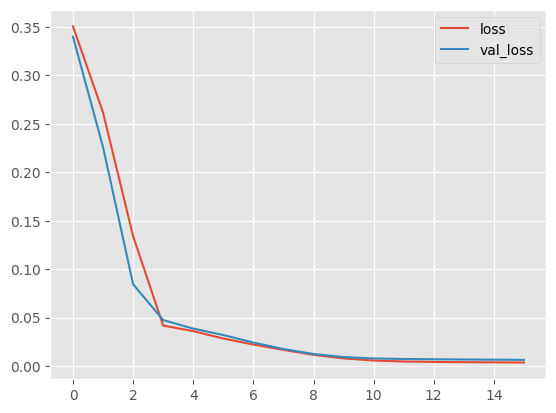

In [77]:
sns.lineplot(history.history["loss"], label="loss")
sns.lineplot(history.history["val_loss"], label="val_loss")

In [78]:
pred_y_scaled = model.predict(x_test_scaled_shaped)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step


In [79]:
pred_y = y_scaler.inverse_transform(pred_y_scaled)

In [80]:
regression_report(y_test,pred_y )

Regression Report:
Mean Square Error: 2.3409150120927467
R2 Score: 0.928111083049953


<Axes: xlabel='date'>

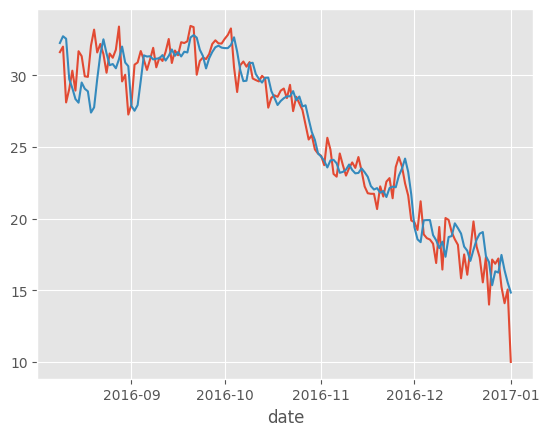

In [81]:
sns.lineplot(x=y_test.index, y=y_test.values)
sns.lineplot(x=y_test.index, y=pred_y.flatten())

Compile the previously defined model specifying **loss function** (`keras.losses`), **optimizer** (`keras.optimizers`) and **evaluation metrics** (`keras.metics`).

In [ ]:
# Write your code here. Add as many boxes as you need.

Train the model on the training set, specifying the **batch size** and **number of epochs** for the training process. Allocate 20% of the samples for **validation**, and ensure that the dataset remains **unshuffled** during training.

In [ ]:
# Write your code here. Add as many boxes as you need.

Create a line plot illustrating both the **training** and **validation loss** over the training epochs.

In [ ]:
# Write your code here. Add as many boxes as you need.

Use the trained model to make predictions for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

Assess the performance of the model by using different metrics provided by the `scikit-learn` library.

In [ ]:
# Write your code here. Add as many boxes as you need.

Create a line plot in order to compare the actual and predicted mean temperatures for the test set.

In [ ]:
# Write your code here. Add as many boxes as you need.

# Laboratory Exercise - Bonus Task (+ 2 points)

As a bonus task for this laboratory exercise, calculate the Simple Moving Average (SMA) and Weighted Moving Average (WMA) with 3 timesteps for `mean_temperature` over the past 1, 2, and 3 days:

- **SMA with 3 timesteps ($\text{SMA}_3$)** - the average of temperatures from the previous 3 days:  
  $SMA_3 = \frac{\text{mean\_temperaure}_{lag\_3} +\ \text{mean\_temperaure}_{lag\_2} +\ \text{mean\_temperaure}_{lag\_1}}{1\ +\ 1\ +\ 1}$.

- **WMA with 3 timesteps ($\text{WMA}_3$)** - a weighted average, giving more importance to recent days:  
  $WMA_3 = \frac{1\ \cdot\ \text{mean\_temperaure}_{lag\_3} +\ 2\ \cdot\ \text{mean\_temperaure}_{lag\_2} +\ 3\ \cdot\ \text{mean\_temperaure}_{lag_1}}{1\ +\ 2\ +\ 3}$.

Then use this indicators alongside the other features in the dataset to predict the `mean_temperaure`.

*Hint: Use the `rolling` method from `pandas`. Check the docs at the following link https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html.*

In [45]:
# Write your code here. Add as many boxes as you need.
df_3

,meantemp,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1
date,,,,,,,,,,,,,
2013-01-04,8.666667,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667
2013-01-05,6.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667
2013-01-06,7.000000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000
2013-01-07,7.000000,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000
2013-01-08,8.857143,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000
2016-12-29,15.238095,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391
2016-12-30,14.095238,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095


In [46]:
df_3["SMA"] = (df_3["meanpressure_3"] + df_3["meanpressure_2"] + df_3["meanpressure_1"]) / 3

C:\Users\User-PC\AppData\Local\Temp\ipykernel_21980\1205300133.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["SMA"] = (df_3["meanpressure_3"] + df_3["meanpressure_2"] + df_3["meanpressure_1"]) / 3


In [48]:
df_3["WMA"] = (1* df_3["meanpressure_3"] + 2 * df_3["meanpressure_2"] + 3 * df_3["meanpressure_1"]) / 6

C:\Users\User-PC\AppData\Local\Temp\ipykernel_21980\1945225778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_3["WMA"] = (1* df_3["meanpressure_3"] + 2 * df_3["meanpressure_2"] + 3 * df_3["meanpressure_1"]) / 6


In [49]:
df_3

,meantemp,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1,SMA,WMA
date,,,,,,,,,,,,,,,
2013-01-04,8.666667,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,1017.377778,1017.877778
2013-01-05,6.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667,1017.877778,1017.772222
2013-01-06,7.000000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000,1017.444444,1017.083333
2013-01-07,7.000000,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,1017.222222,1017.361111
2013-01-08,8.857143,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.000000,1018.166667,1018.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,1016.167460,1016.642460
2016-12-29,15.238095,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,1016.572533,1016.341339
2016-12-30,14.095238,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095,1016.556660,1016.507453


In [ ]:
df_3

In [50]:
addi_features = ["SMA", "WMA"]

In [55]:
df_4 = df_3.copy()

In [54]:
lag = 3 

In [56]:
lags = range(lag, 0, -1)
list(lags)
# df = df.shift(periods=lags)
# df
for lag in lags:
    for column in addi_features:
        df_4[f"{column}_{lag}"] = df_4[column].shift(lag)
df_4

,meantemp,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,...,meanpressure_1,meantemp_1,SMA,WMA,SMA_3,WMA_3,SMA_2,WMA_2,SMA_1,WMA_1
date,,,,,,,,,,,,,,,,,,,,,
2013-01-04,8.666667,84.500000,0.000000,1015.666667,10.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,...,1018.666667,7.166667,1017.377778,1017.877778,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-05,6.000000,92.000000,2.980000,1017.800000,7.400000,87.000000,4.633333,1018.666667,7.166667,71.333333,...,1017.166667,8.666667,1017.877778,1017.772222,NaN,NaN,NaN,NaN,1017.377778,1017.877778
2013-01-06,7.000000,87.000000,4.633333,1018.666667,7.166667,71.333333,1.233333,1017.166667,8.666667,86.833333,...,1016.500000,6.000000,1017.444444,1017.083333,NaN,NaN,1017.377778,1017.877778,1017.877778,1017.772222
2013-01-07,7.000000,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000,82.800000,...,1018.000000,7.000000,1017.222222,1017.361111,1017.377778,1017.877778,1017.877778,1017.772222,1017.444444,1017.083333
2013-01-08,8.857143,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,...,1020.000000,7.000000,1018.166667,1018.750000,1017.877778,1017.772222,1017.444444,1017.083333,1017.222222,1017.361111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,...,1017.200000,16.850000,1016.167460,1016.642460,1013.903680,1013.099567,1013.306061,1013.322727,1014.206854,1015.145887
2016-12-29,15.238095,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,...,1015.565217,17.217391,1016.572533,1016.341339,1013.306061,1013.322727,1014.206854,1015.145887,1016.167460,1016.642460
2016-12-30,14.095238,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,...,1016.904762,15.238095,1016.556660,1016.507453,1014.206854,1015.145887,1016.167460,1016.642460,1016.572533,1016.341339


In [57]:
df_4 = df_4.drop(columns=addi_features)

In [58]:
df_5 = df_4.dropna()

In [59]:
df_5

,meantemp,humidity_3,wind_speed_3,meanpressure_3,meantemp_3,humidity_2,wind_speed_2,meanpressure_2,meantemp_2,humidity_1,wind_speed_1,meanpressure_1,meantemp_1,SMA_3,WMA_3,SMA_2,WMA_2,SMA_1,WMA_1
date,,,,,,,,,,,,,,,,,,,
2013-01-07,7.000000,71.333333,1.233333,1017.166667,8.666667,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,1017.377778,1017.877778,1017.877778,1017.772222,1017.444444,1017.083333
2013-01-08,8.857143,86.833333,3.700000,1016.500000,6.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.000000,1017.877778,1017.772222,1017.444444,1017.083333,1017.222222,1017.361111
2013-01-09,14.000000,82.800000,1.480000,1018.000000,7.000000,78.600000,6.300000,1020.000000,7.000000,63.714286,7.142857,1018.714286,8.857143,1017.444444,1017.083333,1017.222222,1017.361111,1018.166667,1018.750000
2013-01-10,11.000000,78.600000,6.300000,1020.000000,7.000000,63.714286,7.142857,1018.714286,8.857143,51.250000,12.500000,1017.000000,14.000000,1017.222222,1017.361111,1018.166667,1018.750000,1018.904762,1019.023810
2013-01-11,15.714286,63.714286,7.142857,1018.714286,8.857143,51.250000,12.500000,1017.000000,14.000000,62.000000,7.400000,1015.666667,11.000000,1018.166667,1018.750000,1018.904762,1019.023810,1018.571429,1018.071429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-28,17.217391,94.300000,9.085000,1014.350000,14.000000,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,1013.903680,1013.099567,1013.306061,1013.322727,1014.206854,1015.145887
2016-12-29,15.238095,74.857143,8.784211,1016.952381,17.142857,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,1013.306061,1013.322727,1014.206854,1015.145887,1016.167460,1016.642460
2016-12-30,14.095238,67.550000,8.335000,1017.200000,16.850000,68.043478,3.547826,1015.565217,17.217391,87.857143,6.000000,1016.904762,15.238095,1014.206854,1015.145887,1016.167460,1016.642460,1016.572533,1016.341339
